In [2]:
#tool box
import pandas as pd
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

#stylin'
plt.style.use('seaborn-darkgrid')

#import the data
pd.read_excel('Krishna_data.xlsx')

data=pd.read_excel('Krishna_data.xlsx')


FileNotFoundError: [Errno 2] No such file or directory: 'Krishna_data.xlsx'

Text(0.5, 1.0, 'd13C_DIC vs Station ID - Krishna river basin')

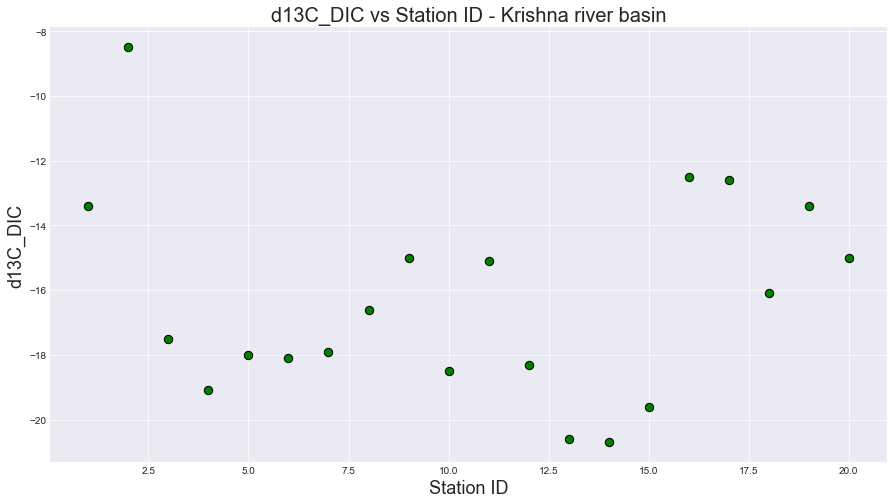

In [2]:
plt.figure(figsize=(15,8))
plt.scatter(data['site_ID'],data['d13C_DIC'], s=70, color='green', edgecolor='black')
plt.ylabel('d13C_DIC',fontsize=18)
plt.xlabel('Station ID',fontsize=18)
# want x ticks to show every integer...
plt.title('d13C_DIC vs Station ID - Krishna river basin', fontsize=20)


mean =  -6.050606060606061
minimum =  -10.2
maxumum =  -3.57


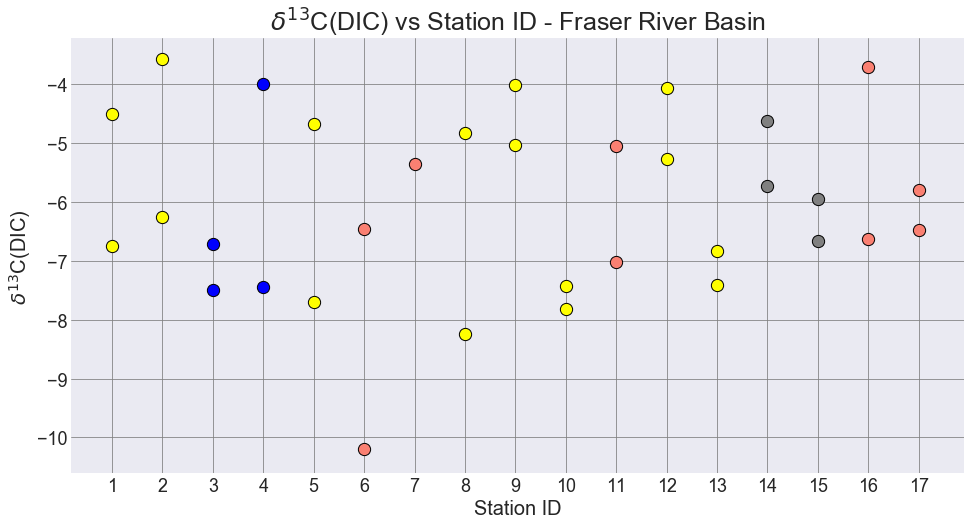

In [3]:
#import the data
pd.read_excel('Frasser_data.xlsx')

data2=pd.read_excel('Frasser_data.xlsx')
plt.figure(figsize=(16,8))
plt.scatter(data2['site_ID'],data2['d13C_y'], s=150, color='yellow', edgecolor='black')
plt.scatter(data2['site_ID'],data2['d13C_b'], s=150, color='blue', edgecolor='black')
plt.scatter(data2['site_ID'],data2['d13C_p'], s=150, color='salmon', edgecolor='black')
plt.scatter(data2['site_ID'],data2['d13C_g'], s=150, color='grey', edgecolor='black')
plt.grid(color='grey')
plt.ylabel('$\delta^{13}$C(DIC)',fontsize=20)
plt.yticks(fontsize=18)
plt.xlabel('Station ID',fontsize=20)
plt.xticks(fontsize=18)
plt.locator_params(axis="x", nbins=19)
# want x ticks to show every integer...
plt.title('$\delta^{13}$C(DIC) vs Station ID - Fraser River Basin', fontsize=25)
plt.savefig('fraser_data.png')
print('mean = ', np.mean(data2['d13C_DIC']))
print('minimum = ', np.amin(data2['d13C_DIC']))
print('maxumum = ', np.amax(data2['d13C_DIC']))

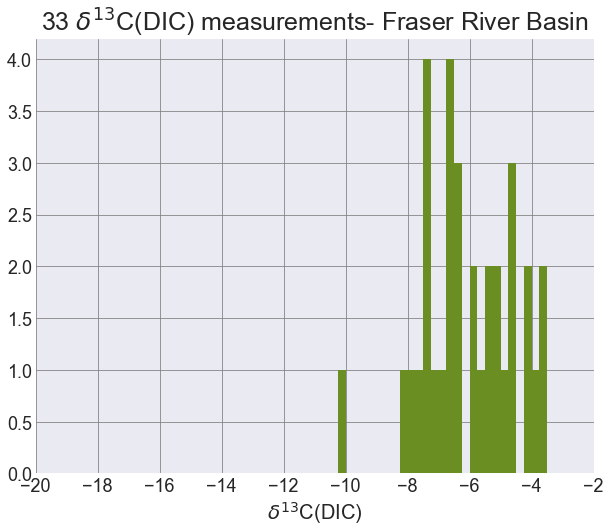

In [5]:
plt.figure(figsize=(10,8))
xaxis=np.arange(-20,5,0.25)
plt.hist(data2['d13C_DIC'],bins=xaxis,color='olivedrab')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.ylabel('',fontsize=18)
plt.xlabel('$\delta^{13}$C(DIC) ',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('33 $\delta^{13}$C(DIC) measurements- Fraser River Basin', fontsize=25)
plt.grid(color='grey')
plt.xlim([-20,-2])
plt.savefig('Fraser_hist.png')

ModeResult(mode=array([-8.67]), count=array([2]))
mean =  -7.526666666666666
standard deviation =  0.8123413153954516
minimum =  -8.67
maxumum =  -5.96


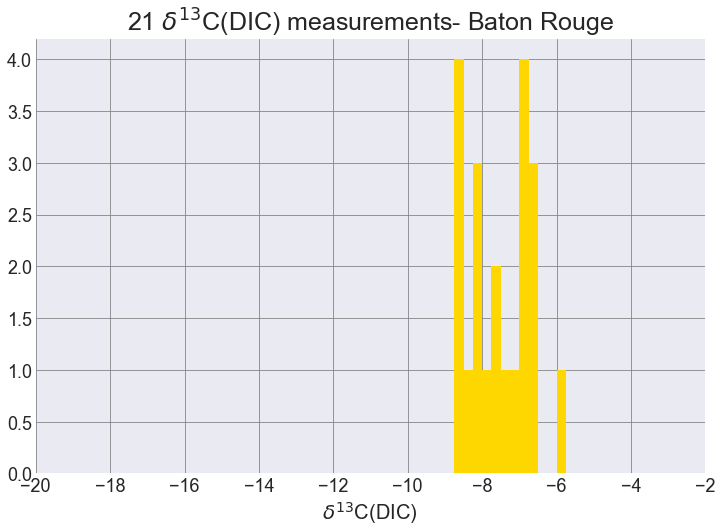

In [7]:
pd.read_excel('Miss_data.xlsx')

data3=pd.read_excel('Miss_data.xlsx')
xaxis=np.arange(-20,5,0.25)
plt.figure(figsize=(12,8))
plt.hist(data3['d13C_DIC'],bins=xaxis,color='gold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.ylabel('',fontsize=18)
plt.xlabel('$\delta^{13}$C(DIC) ',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('21 $\delta^{13}$C(DIC) measurements- Baton Rouge', fontsize=25)
plt.grid(color='grey')
print(stats.mode(data3['d13C_DIC']))
print('mean = ', np.mean(data3['d13C_DIC']))
#print('weighted mean = -9.335113')
print('standard deviation = ', np.std(data3['d13C_DIC']))
print('minimum = ', np.amin(data3['d13C_DIC']))
print('maxumum = ', np.amax(data3['d13C_DIC']))
plt.xlim([-20,-2])
plt.savefig('Lower_Miss_data.png')


ModeResult(mode=array([-15.42857143]), count=array([3]))
mean =  -15.008731796056336
standard deviation =  1.2093715500753033
minimum =  -17.50955414
maxumum =  -11.71428571


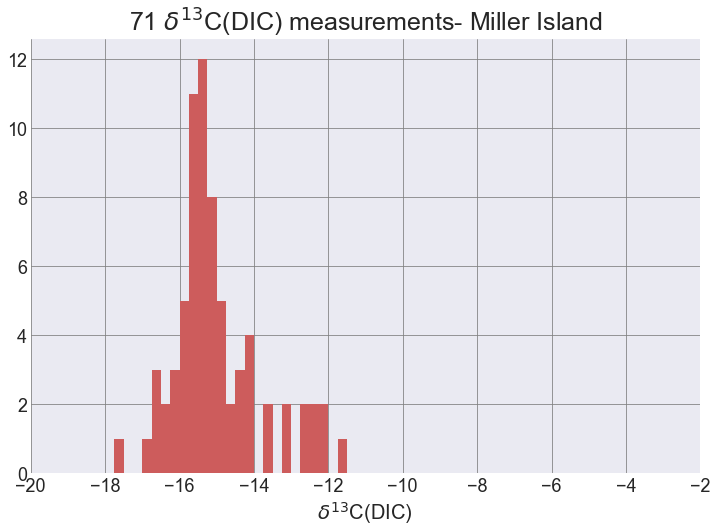

In [6]:
pd.read_excel('Klamath_data.xlsx')

data4=pd.read_excel('Klamath_data.xlsx')
xaxis=np.arange(-20,5,0.25)
plt.figure(figsize=(12,8))
plt.hist(data4['d13C_DIC'],bins=xaxis,color='indianred')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.ylabel('',fontsize=18)
plt.xlabel('$\delta^{13}$C(DIC) ',fontsize=20)
plt.xticks(fontsize=18)
plt.xlim([-20,-2])
plt.yticks(fontsize=18)
plt.title('71 $\delta^{13}$C(DIC) measurements- Miller Island', fontsize=25)
plt.grid(color='grey')
print(stats.mode(data4['d13C_DIC']))
print('mean = ', np.mean(data4['d13C_DIC']))
#print('weighted mean = -9.335113')
print('standard deviation = ', np.std(data4['d13C_DIC']))
print('minimum = ', np.amin(data4['d13C_DIC']))
print('maxumum = ', np.amax(data4['d13C_DIC']))
plt.savefig('Klamath_data.png')


In [3]:
#plotting 3 rivers

#Klamath needs to have pH calculated - use pyCO2sys
data4=pd.read_excel('Klamath_data.xlsx')
kwargs = dict(
    par1 = data4['ppmv'],
    par1_type = 4, #alkalinity
    par2 = data4['DIC'],
    par2_type = 2 #DIC
)
# Import PyCO2SYS
import PyCO2SYS as pyco2

# Run PyCO2SYS
results = pyco2.sys(**kwargs)

# Extract and print out the result
pH_klamath = results['pH']
# print(np.array(pH_klamath))

In [5]:
#solving d13C of DIC based on pH (assuming equilibrium) - making the purple line!

T=20    #degree C
S=35    #PSS
Alk=2300 #microeq/kg
DIC=2100 #micromol/kg
pH = np.arange(4,11,.1)

H=10**(-pH)  #convert pH to H+
TK = T + 273.15        #Convert temperature to Kelvin

#calculating carbonate equilibrium constants from T and S (Lueker et al., 2000, Mar Chem vol70, 105-119)
K1 = 10**(-(3633.86/TK - 61.2172 + 9.67770 * np.log(TK)- 0.011555*S + 0.0001152 * S**2))
K2 = 10**(-(471.78/TK + 25.9290 - 3.16967 * np.log(TK) - 0.01781*S + 0.0001122 * S**2))

#solving for concentrations of DIC components- equations from Zeebee
HCO_3 = DIC/(1 + H/K1 + K2/H)
CO_3 = DIC/(1 + H/K2 + H*H/(K1*K2))
CO2 = DIC/(1 + K1/H + K1*K2/(H*H))

#constant d13C values for indiv DIC components
CO2aq=-9
CO3=-2
HCO3=0

#calculating d13C of DIC based on weighted C concentrations
d13C_DIC = (CO2/DIC)*CO2aq + (CO_3/DIC)*CO3 + (HCO_3/DIC)*HCO3

print('d13C of DIC = ',d13C_DIC)

d13C of DIC =  [-8.88588505 -8.85680764 -8.82047069 -8.77514672 -8.71874494 -8.64876141
 -8.56223804 -8.45574123 -8.32537658 -8.16686113 -7.97567974 -7.74735325
 -7.47784005 -7.16407459 -6.80461163 -6.40029687 -5.95483096 -5.47505965
 -4.97083388 -4.4543609  -3.93909953 -3.43839561 -2.96414246 -2.52574277
 -2.1295459  -1.77878978 -1.47395064 -1.21333881 -0.99377628 -0.81123197
 -0.66134374 -0.53980349 -0.44261269 -0.36623187 -0.30765188 -0.26441239
 -0.23458768 -0.21675398 -0.20994646 -0.21360975 -0.22754136 -0.25182453
 -0.28674524 -0.33268733 -0.39000199 -0.45885345 -0.53905154 -0.629894
 -0.73005169 -0.83753423 -0.94976441 -1.0637663  -1.17644003 -1.28486786
 -1.38658598 -1.47976844 -1.56329874 -1.63673643 -1.70020883 -1.75426547
 -1.7997288  -1.83756324 -1.86877337 -1.89433297 -1.91514104 -1.93199912
 -1.94560358 -1.95654769 -1.96532928 -1.97236127]


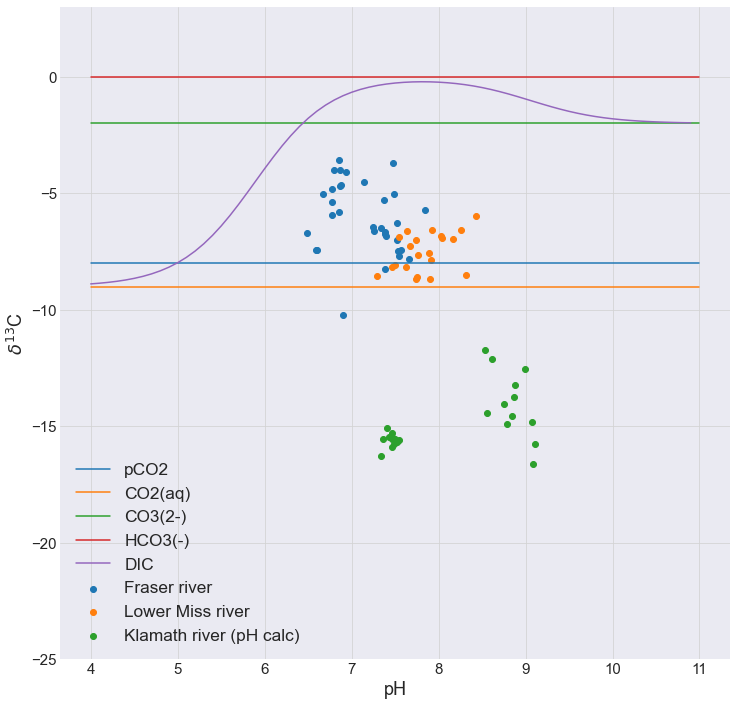

In [6]:
#plotting 3 rivers
data2=pd.read_excel('Frasser_data.xlsx')
data3=pd.read_excel('Miss_data.xlsx') 

pCO2=(-8,-8)
CO2aq=(-9,-9)
CO3=(-2,-2)
HCO3=(0,0)
ph = (4,11)

plt.figure(figsize=(12,12))
plt.plot(ph,pCO2,label='pCO2')
plt.plot(ph,CO2aq, label='CO2(aq)')
plt.plot(ph,CO3, label='CO3(2-)')
plt.plot(ph,HCO3, label='HCO3(-)')
plt.plot(pH,d13C_DIC,label='DIC')
plt.xlabel('pH',fontsize=18)
plt.ylabel('$\delta^{13}$C',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='lightgrey')
plt.ylim(-25,3)
plt.scatter(data2['pH'],data2['d13C'],label = 'Fraser river')
plt.scatter(data3['pH'],data3['d13C'],label = 'Lower Miss river')
plt.scatter(pH_klamath ,data4['d13C_DIC'],label = 'Klamath river (pH calc)')
# plt.scatter(X,Y,label='pH binned averages for d13C data',color='black')
# plt.plot(X,Y, linestyle='dashed',color='black')
plt.legend(loc='best',fontsize='xx-large',frameon=False)


/Users/oliviawren/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


-17.50955414
-5.96


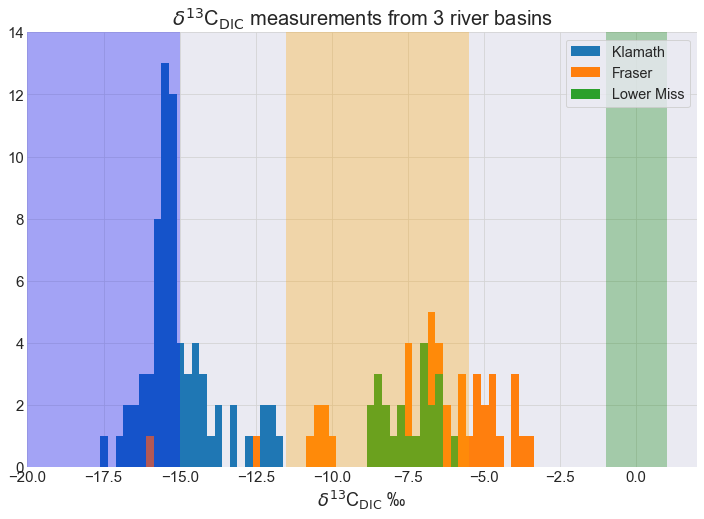

In [4]:
data1=pd.read_excel('/Users/oliviawren/Rivers Project/river_13C_data(4).xlsx')
subset=pd.DataFrame({'geo_class':['river','river plume','river mouth','tributary','catchment','watershed','reservoir','stream']})
data=subset.merge(data1,on='geo_class')

#d13C_DIC_rivers histogram- 3 rivers
import matplotlib.patches as patches
fig, ax = plt.subplots(figsize=(12,8))

x_grid=np.arange(-17.6,7.5,.25)
idx = data['doc_id']=='54fb0ae8e138239936c6d217'
plt.hist(data['d13C_DIC'][idx],bins=x_grid,label = 'Klamath')
print(np.min(data['d13C_DIC'][idx]))
idx = data['doi']=='0.1016/0009-2541(95)00007-9'
plt.hist(data['d13C_DIC'][idx],bins=x_grid,label = 'Fraser')
idx = data['doc_id']=='5802803dcf58f14a9e00b763'
plt.hist(data['d13C_DIC'][idx],bins=x_grid,label = 'Lower Miss')
print(np.max(data['d13C_DIC'][idx]))

rect_Com = patches.Rectangle((-1, 0), 2, 50, edgecolor='none', facecolor='g',alpha=.3)
rect_Ccw = patches.Rectangle((-11.5, 0), 6, 50, edgecolor='none', facecolor='orange',alpha=.3)
rect_Cncw = patches.Rectangle((-23, 0), 8, 50, edgecolor='none', facecolor='b',alpha=.3)
ax.add_patch(rect_Com)
ax.add_patch(rect_Ccw)
ax.add_patch(rect_Cncw)
plt.ylim(0,14)
plt.xlim(-20,2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.ylabel('',fontsize=18)
plt.xlabel('$\delta^{13}$C$_{\mathrm{DIC}}$ ‰ ',fontsize=18)
plt.title('$\delta^{13}$C$_{\mathrm{DIC}}$ measurements from 3 river basins', fontsize=20)
plt.grid(color='lightgrey')
plt.legend(loc='best',fontsize='x-large',frameon=True)